In [1]:
import numpy as np

#
**Solution**
***

##
**Task 1**
***

In [2]:
#Defining eta and probability
etas = np.array([-np.sqrt(3), 0, np.sqrt(3)])
probs = np.array([1/6, 2/3, 1/6])

In [3]:
#Defining variables
beta = 0.9
gamma = 4.0
sigma = 0.16
mu = 0.04
w = 1.0
R_f = 1.0

In [4]:
#Calculating risky return
R  = R_f + mu + sigma * etas #As etas is an array, NumPy automatically calculates for every value
print(f"Rate of return on the risky asset is {R[0]:.2f}, {R[1]:.2f} or {R[2]:.2f}.")

Rate of return on the risky asset is 0.76, 1.04 or 1.32.


In [5]:
#Calculating mean expected rate of return
E_r = np.sum(probs * R)
print(f"The wheigted average rate of return on a risky asset is {E_r}.")

The wheigted average rate of return on a risky asset is 1.04.


In [6]:
#Calculating deviation and variance
deviation = R - E_r

quad = deviation ** 2

In [7]:
var = np.sum(quad * probs)
print(f"The variance is {var}, which is equal to 0.16^2")

The variance is 0.0256, which is equal to 0.16^2


As we can see, both the variance and the expected excess return are equal to the ones given in the table above.

The variance $\sigma$ is given as $0.16^2$, which is equal to $0.0256$\
The expected excess return $\mu$ is given as $0.04$, equal to our calculations of $\mu = 1.04$.

##
**Task 2**
***

In [8]:
#Creating function
def util(c, gamma):
    """
    Return the flow utility of consumption for a given risk aversion

    Parameters:
        c (float or array): consumption
        gamma (float): risk aversion

    Returns:
        utility value(u)
    """
    return -np.exp(-gamma * c)

In [9]:
import matplotlib.pyplot as plt

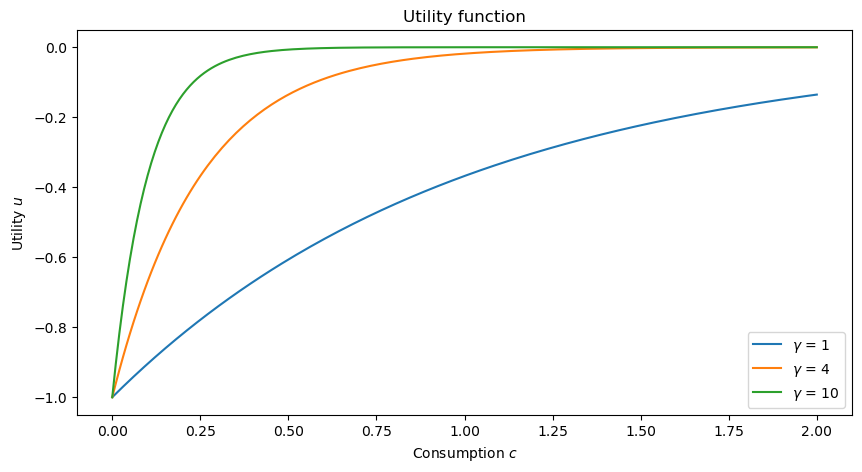

In [10]:
gamma_values = np.array([1, 4, 10])
c = np.linspace(0, 2, 200)

fig, ax = plt.subplots(figsize = (10, 5))

for g in gamma_values:
    ax.plot(
        c,
        util(c, g),
        label = rf"$\gamma$ = {g}"
    )

ax.legend()
ax.set_xlabel("Consumption $c$")
ax.set_ylabel("Utility $u$")
ax.set_title("Utility function")

plt.show()

As the utility function is given in the task, we can simply insert it into the function using the `np.exp()`function. This allows for the use of both scalars and arrays.

The plot is given in the figure UtilityFunction.

##
**Task 3**
***

In [11]:
def expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs):
    '''
    Calculate the expected lifetime utility for given parameters.

    Parameters:
    s
    alpha
    beta
    gamma
    sigma
    mu
    w
    etas
    probs

    Returns:
    Expected lifetime utility
    '''
    R_f = 1.0

    c1 = w - s
    u1 = util(c1, gamma)

    Eu2 = 0.0

    for eta, p in zip(etas, probs):

        R = R_f + mu + sigma * eta
        c2 = (alpha * R + (1 - alpha) * R_f) * s

        Eu2 += p * util(c2, gamma)

    return u1 + beta * Eu2

In [12]:
print(f"{expected_util(0.5, 0.5, beta, gamma, sigma, mu, w, etas, probs):.4f}")

-0.2539


Testing the function with 50% of the wealth $w$ saved, and 50% of saved $s$ invested in a risky asset $\alpha$, gives a expected lifetime utility of -0.2539.

##
**Task 4**
***

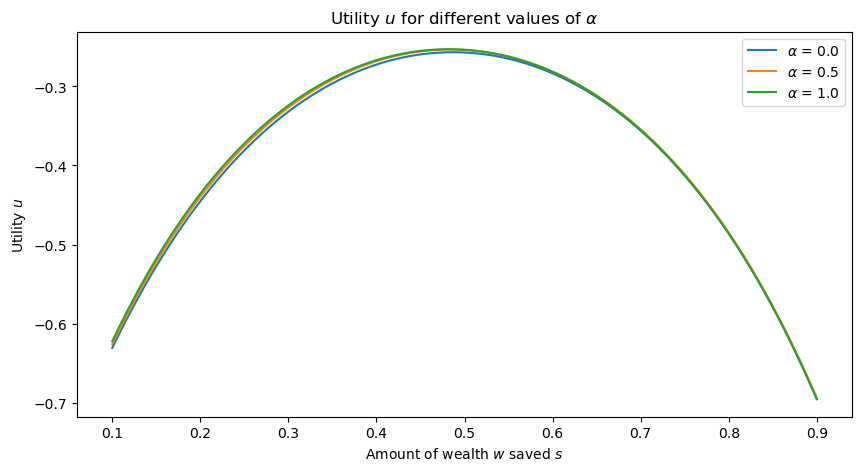

In [47]:
s_choices = np.linspace(0.1, w - 0.1, 200)

fig, ax = plt.subplots(figsize = (10, 5))

for a in np.linspace(0, 1, 3):
    utility = expected_util(
        s_choices,
        a,
        beta,
        gamma,
        sigma,
        mu,
        w,
        etas,
        probs)

    ax.plot(
        s_choices,
        utility,
        label = rf"$\alpha$ = {a}"
    )

ax.legend()
ax.set_xlabel(rf"Amount of wealth $w$ saved $s$")
ax.set_ylabel(rf"Utility $u$")
ax.set_title(rf"Utility $u$ for different values of $\alpha$")
#ax.set_ylim(-0.35, -0.25) #Could use this to see differences better

plt.show()

The graph is bent down (concave) because the investor is risk-averse, and has falling marginal utility. When savings $s$ si low, marginal utility $u$ increases, as this will increase consumption $c$ in period 2. At some point, the marginal utility will fall, as increased saving will mean a too big decrease in consumption in period 1. Diminishing marginal benefit of saving becomes smaller than the marginal cost.

##
**Task 5**
***